In [34]:
import os
import pandas as pd
import numpy as np

DIR = os.getcwd()
print(DIR)

df = pd.read_csv(DIR + "/2016contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df.head()

/Users/lukedobrovic/Data/CampaignContributions


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (12,15,25,31,37,57) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00575795,HILLARY FOR AMERICA,2016,M10,201701099041150117,17A,C11241249,1137625,NaN,IND,...,F3P,4010920171359608009,t,NaN,2016,SA,NaN,4011120171366214585,http://docquery.fec.gov/cgi-bin/fecimg/?201701...,Contributions From Individuals/Persons Other T...
1,C00575795,HILLARY FOR AMERICA,2016,12G,201701099041274498,17A,C12244496,1137788,NaN,IND,...,F3P,4010920171359608011,t,NaN,2016,SA,NaN,4011120171366556953,http://docquery.fec.gov/cgi-bin/fecimg/?201701...,Contributions From Individuals/Persons Other T...
2,C00179408,MAINE DEMOCRATIC PARTY,2016,M9,201909059163143517,11AI,11AI-000039245,1350680,NaN,IND,...,F3X,4090520191672279180,t,NaN,2016,SA,NaN,4090620191672313017,http://docquery.fec.gov/cgi-bin/fecimg/?201909...,Contributions From Individuals/Persons Other T...
3,C00575795,HILLARY FOR AMERICA,2016,12G,201701099041229457,17A,C13058022,1137788,NaN,IND,...,F3P,4010920171359608011,t,NaN,2016,SA,NaN,4011120171366421831,http://docquery.fec.gov/cgi-bin/fecimg/?201701...,Contributions From Individuals/Persons Other T...
4,C00575795,HILLARY FOR AMERICA,2016,12G,201701099041267803,17A,C12514715,1137788,NaN,IND,...,F3P,4010920171359608011,t,NaN,2016,SA,NaN,4011120171366536867,http://docquery.fec.gov/cgi-bin/fecimg/?201701...,Contributions From Individuals/Persons Other T...


In [39]:
# df.columns
df_selections = df[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

In [40]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA"]

df_selections = df_selections[~df_selections.contributor_employer.str.contains('|'.join(faux))]

In [41]:
df_selections.committee_name.unique()
#HILLARY Victory Fund, HILLARY for President, HILLARY Action Fund are funds with HILLARY in name

array(['HILLARY FOR AMERICA', 'MAINE DEMOCRATIC PARTY',
       'FRIENDS OF JOHN PLUMB', "DNC SERVICES CORP./DEM. NAT'L COMMITTEE",
       'COLLEEN DEACON FOR CONGRESS', 'DR. MATT HEINZ FOR ARIZONA',
       'FRIENDS OF CHERI BUSTOS', 'KATIE MCGINTY FOR SENATE',
       'LATINO LEADERS FOR EQUALITY GROWTH OPPORTUNITY PROGRESSIVE ACTION & CHANGE (LLEGO-PAC)',
       'ZEPHYR TEACHOUT FOR CONGRESS', 'REPUBLICAN NATIONAL COMMITTEE',
       'ACTBLUE',
       'POLITICAL ACTION COMMITTEE OF THE AMERICAN ASSOCIATION OF ORTHOPAEDIC SURGEONS--PAC OF AAOS',
       'JULIA BROWNLEY FOR CONGRESS', 'KAINE FOR VIRGINIA',
       'DEMOCRATIC ACTION', "O'MALLEY FOR PRESIDENT",
       'CAROLINE FAYARD FOR US SENATE', 'MAGGIE FOR NH',
       'DEBORAH ROSS FOR SENATE', 'MARCO RUBIO FOR SENATE 2016',
       'FRIENDS OF SCHUMER', 'BENNET FOR COLORADO', 'TAMMY FOR ILLINOIS',
       'DSCC', 'KAMALA HARRIS FOR SENATE',
       'PROGRESSIVE CHANGE CAMPAIGN COMMITTEE', 'HILLARY ACTION FUND',
       'TED DEUTCH FOR CON

In [22]:
df_HILLARY = df_selections[df_selections["committee_name"].str.contains("HILLARY")]

df_HILLARY.reset_index()

df_trump = df_selections[df_selections["committee_name"].str.contains("TRUMP")]

df_trump.reset_index()

,index,committee_name,contribution_receipt_date,contribution_receipt_amount,contributor_employer,contributor_occupation
0,828,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-06-28,40.0,COLUMBIA UNIVERSITY,FINANCIAL ANALYST
1,904,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-06-03,80.0,COLUMBIA UNIVERSITY,CHEMIST
2,906,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-17,250.0,COLUMBIA UNIVERSITY,PHYSICIAN
3,918,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-06,2.4,COLUMBIA UNIVERSITY,STUDENT
4,948,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-11,28.0,COLUMBIA UNIVERSITY,PROFESSOR
5,7660,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-10-23,80.0,COLUMBIA UNIVERSITY,ASSOCIATE PROFESSOR
6,9540,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-03-09,150.8,COLUMBIA UNIVERSITY,PROFESSOR
7,12214,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,2016-09-09,250.0,COLUMBIA UNIVERSITY,PHYSICS PROFESSOR
8,12326,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,2016-10-14,50.0,COLUMBIA UNIVERSITY,ADMIN
9,12334,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,2016-10-15,100.0,COLUMBIA UNIVERSITY,ADMIN


In [42]:
df_HILLARY.head(10)

,contribution_receipt_date,contribution_receipt_amount
0,2015-04-12,3625.00
1,2015-04-13,500.00
2,2015-04-14,5575.00
3,2015-04-17,600.00
4,2015-04-18,50.00
5,2015-04-19,1250.00
6,2015-04-20,1.25
7,2015-04-23,25.00
8,2015-04-26,10.00
9,2015-05-03,25.00


In [43]:
df_trump.head()

,contribution_receipt_date,contribution_receipt_amount
0,2016-03-09,150.8
1,2016-06-03,80.0
2,2016-06-28,40.0
3,2016-08-06,4.8
4,2016-08-11,28.0


In [44]:
df_HILLARY = df_HILLARY.groupby(["contribution_receipt_date"], as_index=False).sum()

df_trump = df_trump.groupby(["contribution_receipt_date"], as_index=False).sum()

Text(0.5, 1.0, 'Contributions to Committees w/ TRUMP in their name since announcement of 2020 HILLARY Candidacy')

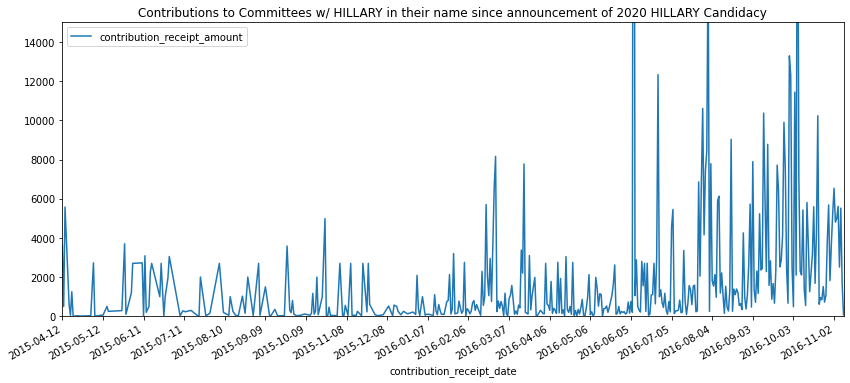

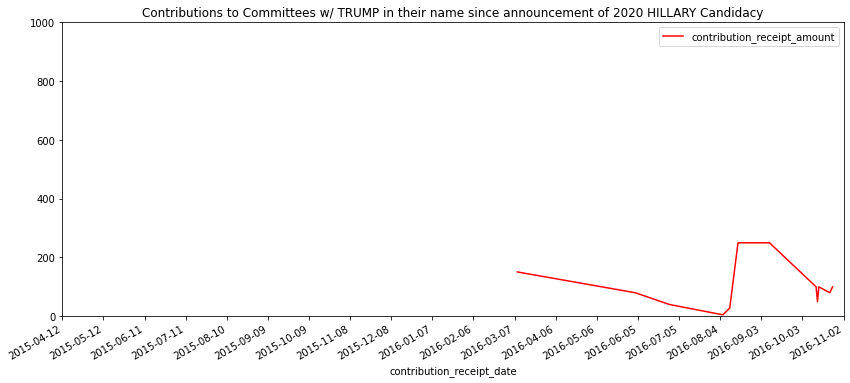

In [45]:
from datetime import datetime, timedelta
t = np.arange(datetime(2015,4,12), datetime(2016,11,10), timedelta(days=30)).astype(datetime)
# y = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]

ax1 = df_HILLARY.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, 15000])
ax1.set_title("Contributions to Committees w/ HILLARY in their name since announcement of 2020 HILLARY Candidacy")


ax2 = df_trump.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
                   figsize=(14,6),
                   color="red")
ax2.set_xticks(t)
ax2.set_ylim([0, 1000])
ax2.set_title("Contributions to Committees w/ TRUMP in their name since announcement of 2020 HILLARY Candidacy")

In [46]:
df_committees = df_selections.groupby(["committee_name"], as_index=False).sum()
df_committees.sort_values(by="contribution_receipt_amount", ascending=False, inplace=True)
df_committees.reset_index(inplace=True)

df_committees.head()

,index,committee_name,contribution_receipt_amount
0,114,HILLARY FOR AMERICA,500676.25
1,3,ACTBLUE,309322.37
2,115,HILLARY VICTORY FUND,254416.16
3,68,DNC SERVICES CORP./DEM. NAT'L COMMITTEE,228416.63
4,24,BERNIE 2016,69740.95


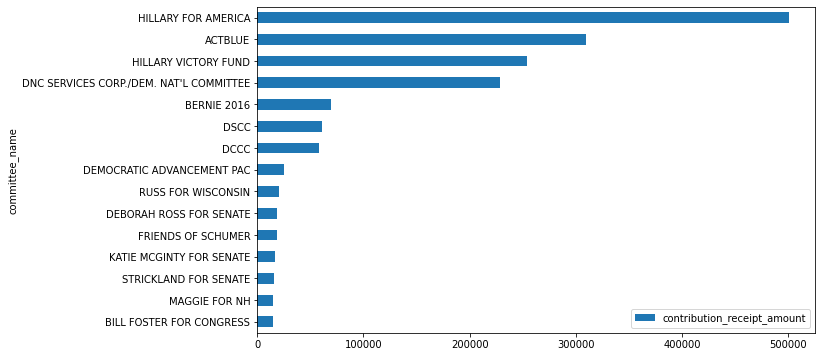

In [47]:
ax3 = df_committees.head(15).plot(kind="barh",
                        x = "committee_name",
                        y = "contribution_receipt_amount",
                                 figsize=(10,6))
ax3.invert_yaxis()

In [48]:
occupations = df_selections["contributor_occupation"].value_counts()
occupations

PROFESSOR                                 4840
PHYSICIAN                                 3334
STUDENT                                   1852
GRADUATE STUDENT                           687
ADJUNCT PROFESSOR                          418
                                          ... 
SENIOR ADMINISTRATIVE COORDINATOR            1
HISTORY PROFESSOR                            1
DIRECTOR OF EXPERIENTIAL LEARNING & AP       1
BEHAVIORAL MEDICINE RESEARCH                 1
FINANCE COORDINATOR                          1
Name: contributor_occupation, Length: 696, dtype: int64

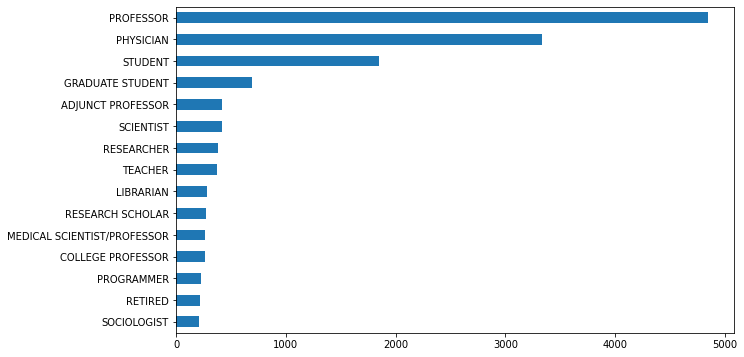

In [49]:
ax4 = occupations.head(15).plot(kind="barh",
                               figsize=(10,6))
ax4.invert_yaxis()

In [58]:
df_occ = df_selections.drop_duplicates(subset=["contributor_last_name", "contributor_middle_name",
                                              "contributor_middle_name"])
occupations = df_first["contributor_occupation"].value_counts()

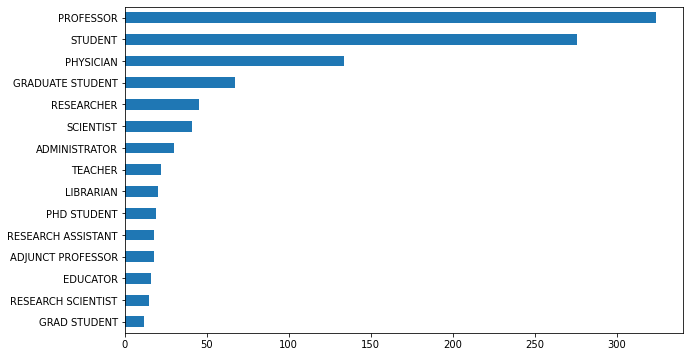

In [59]:
ax5 = occ.head(15).plot(kind="barh",
                               figsize=(10,6))
ax5.invert_yaxis()